In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk
from konlpy.tag import Okt, Kkma, Hannanum
from PIL import Image

In [6]:
gfgift = pd.read_excel('./result/여친%20선물_2020.12.08_crawling_result.xlsx', engine='openpyxl')
gfgift = gfgift.fillna('')
gfgift.tail()

,재목,질문,답변
4311,여친 선물을 뭘 해주어야할까요?,일단 저희는 중학생입니다 곧있으면 여친 생일인데 뭘 해주어야 할까요?,"중딩여자친구 선물로 나이키,아디다스 같은 브랜드의 후드티나 후드집업 선물 추천드립니..."
4312,,,흠...중학생이면 가격대비 보다는 정성이 중요할 것 같습니다. 우선 악세서리도 좋을...
4313,,,물어보세요~괜히 이상한거 하지말고 물어보고 하시면 됩니다. 제일 좋음물어보세요~괜히...
4314,,,꽃무늬빤스꽃무늬빤스꽃무늬빤스꽃무늬빤스꽃무늬빤스꽃무늬빤스
4315,,,안녕하세요. 공연기획사 파릇입니다 :)곧 있으면 여자친구분 생일이시군요! 축하의 말...


In [31]:
gfgift.columns

Index(['재목', '질문', '답변'], dtype='object')

In [7]:
title = gfgift['재목']
content = gfgift['질문']
answer = gfgift['답변']

In [8]:
total = title + content + answer
total = total.to_numpy()
total = ' '.join(total)

In [10]:
# 텍스트 파일로 다운로드
f = open('./result/여친선물.txt', 'w', encoding='utf8')
f.write(total)
f.close()

In [34]:
# 영문자, 숫자 제거
import re
total = re.sub('[a-zA-Z0-9]','',total).strip()

In [35]:
len(total)

4132631

In [36]:
# 명사 뽑아오기
okt = Okt()
tokens_ko = okt.nouns(total)

In [37]:
tokens_ko[:10]

['여친', '선물', '추천', '좀', '광고', '커플', '템', '시계', '거', '반지']

In [43]:
# 사용된 총 단어의 종류(개수)
ko = nltk.Text(tokens_ko, name = '여자친구 선물')

In [55]:
# 불용어
stop_words = ['.','(',')',',',"'",'%','-','X',').','x','의','자','에','안','번','호','을','이','다','만','로','가','를','여친','선물','추천','좀','광고','커플','템','거','제품','여자','수','여자친구','것','사랑','해','가격','오늘','여성','구매','배송','후기','저','원','더','요','만원','최저','등','스']

# 불용어 제거
ko = [each_word for each_word in ko if each_word not in stop_words]
ko = nltk.Text(ko, name='여자친구 선물')

# 단어의 빈도수
ko.vocab()

FreqDist({'향수': 5255, '팔찌': 4687, '시계': 4534, '목걸이': 3667, '브랜드': 3276, '세트': 3215, '지갑': 2835, '미쁜': 2828, '사진': 2452, '꽃': 2366, ...})

In [57]:
mask = np.array(Image.open('./source/gfgift.jpg'))

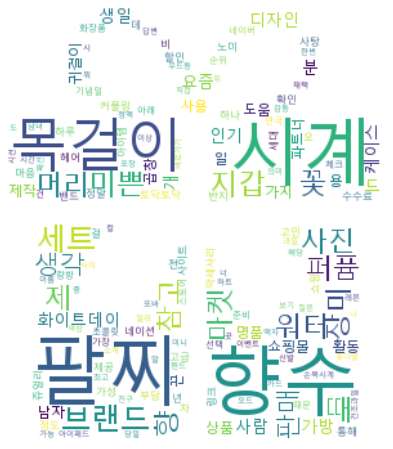

In [58]:
from wordcloud import WordCloud

data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     width=1000,height=600,
                     mask=mask).generate_from_frequencies(dict(data))
            
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()